In [3]:
import pandas as pd

In [10]:
with open('res.csv') as f0:
    with open('responses.csv', 'w') as f1:
        f1.write('id,ip,controller,item,element,label,square,element-type,element-name,parameter,value,event-time,none,situation,count,comment\n')
        for line in f0.readlines():
            if (line.count('Selector')) and (line.count(',') == 15):
                f1.write(line)

In [16]:
with open('res.csv') as f0:
    with open('age.csv', 'w') as f1:
        f1.write('id,age\n')
        for line in f0.readlines():
            if line.count('age,'):
                cropped = line[line.find('Final') + 6:]
                cropped = cropped[:cropped.find(',')]
                f1.write(line[:line.find(',')] + ',' + cropped + '\n')

In [17]:
with open('res.csv') as f0:
    with open('linguist.csv', 'w') as f1:
        f1.write('id,linguist\n')
        for line in f0.readlines():
            if line.count('linguist,'):
                cropped = line[line.find('Choice') + 7:]
                cropped = cropped[:cropped.find(',')]
                f1.write(line[:line.find(',')] + ',' + cropped + '\n')

In [12]:
res = pd.read_csv('responses.csv')
age = pd.read_csv('age.csv')
linguist = pd.read_csv('linguist.csv')

In [13]:
res = res.set_index('id').join(age.set_index('id'))

In [14]:
res.head()

,ip,controller,item,element,label,square,element-type,element-name,parameter,value,event-time,none,situation,count,comment,age
id,,,,,,,,,,,,,,,,
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,11,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703510925433,undefined,moscow,0,sent_vs;sent_sv,1
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,12,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703510926062,undefined,tigers,0,sent_vs;sent_sv,1
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,18,0,experiment,NaN,Selector,answer,Selection,sent_sv,1703510926585,undefined,wheels,0,sent_sv;sent_vs,1
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,3,0,experiment,NaN,Selector,answer,Selection,sent_sv,1703510927086,undefined,carriages,1,sent_sv;sent_vs,1
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,7,0,experiment,NaN,Selector,answer,Selection,sent_sv,1703510927573,undefined,horns,0,sent_sv;sent_vs,1


In [17]:
res = res[res.age >= 18]

In [18]:
res.shape

(630, 16)

In [21]:
target_parameters = ['bows','carriages','computers','buttons','lightbulbs','horns','baskets','castles','drawers']

In [27]:
target = res[res.situation.isin(target_parameters)]

In [28]:
target.shape

(315, 16)

In [29]:
target.head()

,ip,controller,item,element,label,square,element-type,element-name,parameter,value,event-time,none,situation,count,comment,age
id,,,,,,,,,,,,,,,,
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,7,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703514657376,undefined,horns,2,sent_sv;sent_vs,19
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,8,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703514679298,undefined,baskets,1,sent_vs;sent_sv,19
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,3,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703514722416,undefined,carriages,0,sent_sv;sent_vs,19
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,6,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703514756103,undefined,lightbulbs,0,sent_vs;sent_sv,19
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,2,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703514766880,undefined,bows,1,sent_sv;sent_vs,19


In [30]:
import matplotlib.pyplot as plt

In [58]:
stat = target[target.value == 'sent_sv'].groupby(['situation', 'count'])['value'].count() / target.groupby(['situation', 'count'])['value'].count()

In [59]:
stat.groupby('count').mean()

count
0    0.584325
1    0.588889
2    0.522321
Name: value, dtype: float64

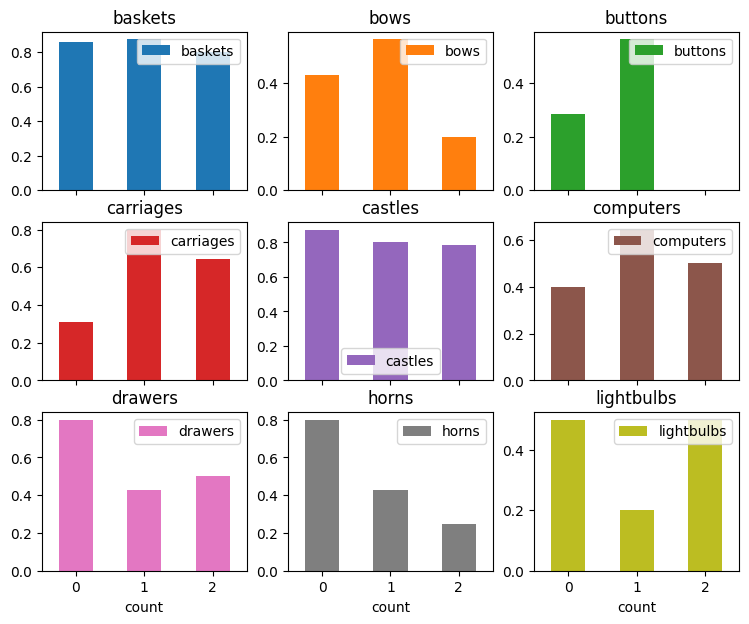

In [62]:
ax = stat.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(3,3))
